## Project - Predicting Employee Productivity (Classification) using Decision Trees and Random Forests

#### The garment industry is a highly labour-intensive industry with lots of manual processes. The capacity to meet consumer demands is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.

#### In this project, we will aim to predict if a team is Productive or not. The current dataset has two key variables - ' Targeted Productivity' and 'Actual Productivity', which have been used to label the observations, as 'Productive' or 'Not Productive', based on whether the Actual Productivity met/exceeded Targeted Productivity or not. This re-labelled dataset is then used to build the Classification Models using Decision Trees and Random Forests. 

##### The dataset can be found in the below link of UCI Machine Learning Repository : 

https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV


from datetime import datetime as dt

In [2]:
df = pd.read_csv('garments_worker_productivity.csv')

df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df["department"].value_counts().index

# There are white spaces

Index(['sweing', 'finishing ', 'finishing'], dtype='object')

In [4]:
df["team"].value_counts().sort_index()

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

In [5]:
df.head(2).transpose()

,0,1
date,1/1/2015,1/1/2015
quarter,Quarter1,Quarter1
department,sweing,finishing
day,Thursday,Thursday
team,8,1
targeted_productivity,0.8,0.75
smv,26.16,3.94
wip,1108.0,NaN
over_time,7080,960
incentive,98,0


In [6]:
df.shape

(1197, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [9]:
cols_num = list(df.describe().columns)

In [10]:
## Checking for data types of all numerical columns

for col in cols_num:
    print('Column Name' , col)
    print(df[col].value_counts().sort_index())

Column Name team
1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64
Column Name targeted_productivity
0.07      1
0.35     27
0.40      2
0.50     49
0.60     57
0.65     63
0.70    242
0.75    216
0.80    540
Name: targeted_productivity, dtype: int64
Column Name smv
2.90     108
3.90      20
3.94     192
4.08      21
4.15      76
        ... 
49.10      1
50.48      2
50.89      1
51.02      1
54.56      1
Name: smv, Length: 70, dtype: int64
Column Name wip
7.0        1
10.0       1
11.0       1
12.0       1
13.0       1
          ..
16882.0    1
21266.0    1
21385.0    1
21540.0    1
23122.0    1
Name: wip, Length: 548, dtype: int64
Column Name over_time
0        31
120       1
240       6
360       2
480       1
         ..
13800     1
14640     1
15000     2
15120     1
25920     1
Name: over_time, Length: 143, dtype: int64
Column Name incentive
0       604
21        1
23       38
24      

#### Thus, the data types for numerical columns match with the expected data types(int and float). The only issues among numerical columns are that for 'wip', there are missing values and for actual_productivity, the max value is more than 1.  We will rectify the same. 

In [11]:
df["wip"].value_counts(dropna = False)

NaN       506
1039.0      5
1282.0      4
562.0       3
1422.0      3
         ... 
1118.0      1
1044.0      1
893.0       1
1061.0      1
1211.0      1
Name: wip, Length: 549, dtype: int64

#### We cannot be sure that the missing values are due to missing information or due to unfinished products. Due to this uncertainty, we should drop this column. During the data cleaning stage, we will do the same. 

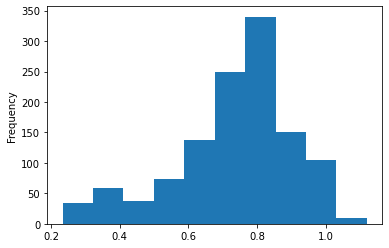

In [12]:
df['actual_productivity'].plot.hist()
#plt.xticks([0,1])
plt.show()

In [13]:
df['actual_productivity'].value_counts().sort_index()

0.233705    1
0.235795    1
0.238042    1
0.246250    1
0.247316    1
           ..
1.059621    1
1.096633    1
1.100484    1
1.108125    1
1.120437    1
Name: actual_productivity, Length: 879, dtype: int64

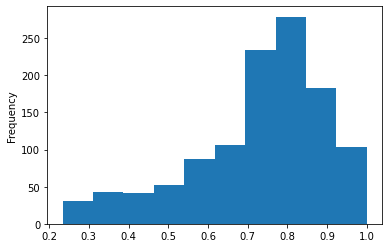

In [14]:
actual_prod_less_than_1 = df['actual_productivity'][df['actual_productivity'] <=1]
actual_prod_less_than_1.plot.hist()
plt.show()

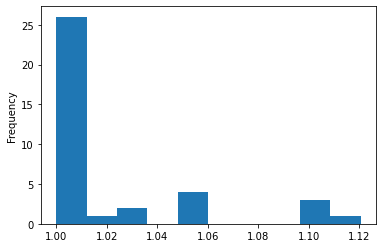

In [15]:
actual_prod_more_than_1 = df['actual_productivity'][df['actual_productivity'] > 1]
actual_prod_more_than_1.plot.hist()
plt.show()

#### We will replace all those entries where productivity is greater than 1, with the mean of the entries where actual productivity is less than 1. 

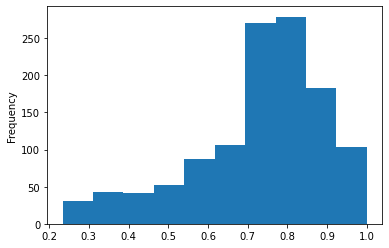

In [16]:
df.loc[df['actual_productivity'] > 1, 'actual_productivity'] = actual_prod_less_than_1.mean()

df['actual_productivity'].plot.hist()
plt.show()

#### Now that the numerical columns have been cleaned, we can check the categorical columns. 

In [17]:
all_cols = list(df.columns)
cols_cat = [x for x in all_cols if x not in cols_num]

In [18]:
for col in cols_cat:
    print('------------------')
    print('Column Name =', col)
    print(df[col].value_counts())
    print('\n')
          

------------------
Column Name = date
3/11/2015    24
1/31/2015    24
1/24/2015    23
1/11/2015    23
1/12/2015    23
3/10/2015    23
1/7/2015     22
1/22/2015    22
1/5/2015     22
1/13/2015    22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/8/2015     22
1/10/2015    22
2/28/2015    21
1/27/2015    21
1/6/2015     21
1/3/2015     21
2/25/2015    21
1/28/2015    21
1/17/2015    21
2/18/2015    21
3/4/2015     21
1/4/2015     21
2/26/2015    21
1/14/2015    21
1/25/2015    21
2/19/2015    20
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/15/2015    19
2/8/2015     19
2/10/2015    19
2/24/2015    19
2/2/2015     19
3/7/2015     19
3/5/2015     19
1/26/2015    19
1/18/2015    19
2/7/2015     19
2/12/2015    19
2/3/2015     19
1/19/2015    19
2/23/2015    19
2/11/2015    19
1/1/2015     19
2/4/2015     19
2/1/2015     19
1/21/2015    19
1/15/2015    19
2/9/2015     18
2/5/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: date, dtype:

In [19]:
df['date'].dtype

dtype('O')

#### The observations, and potential rectifications of categorical columns' data is mentioned below : 


1. Date - The data type can be modified to make it datetime, so that relevant data can be extracted. 
2. Quarter - A year has 4 quarters. Quarter 5 could have some meaning. To be checked. 
3. Department - The 'Finishing' department has been mentioned twice, most likely due to whitespaces, which will be removed. 
4. day - 'Friday' is missing, most likely due to the factory remaining closed on Fridays. 

In [20]:
df['date'].head(2)

0    1/1/2015
1    1/1/2015
Name: date, dtype: object

In [21]:
df['date'] = df['date'].apply(lambda x: dt.strptime(x,'%m/%d/%Y'))

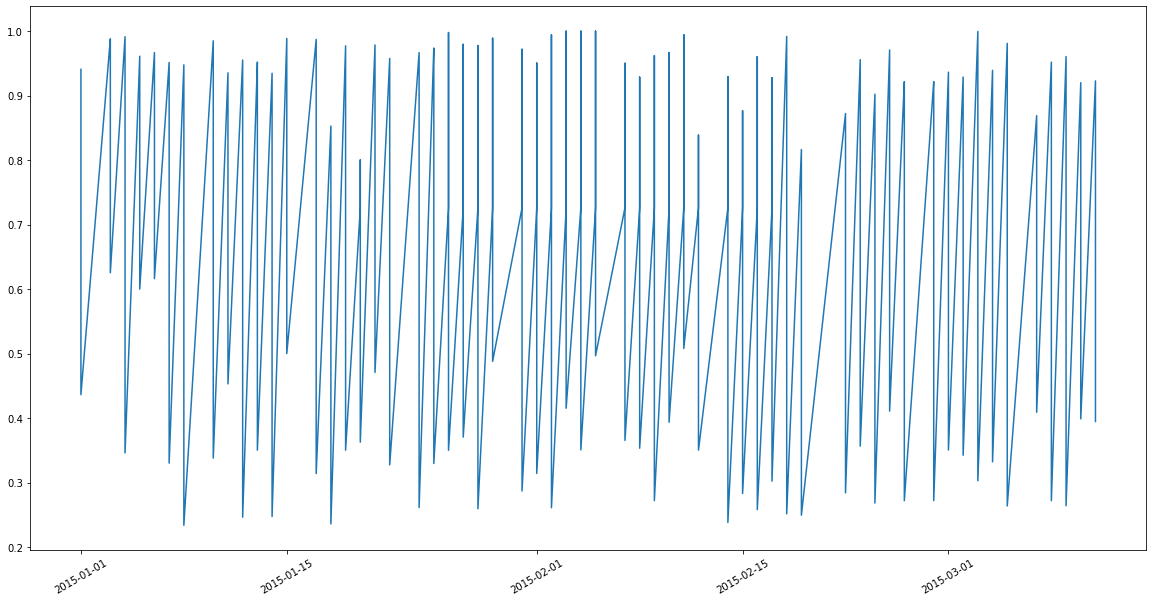

In [22]:
plt.figure(figsize = ([20,10]))
plt.plot(df['date'], df['actual_productivity'])
plt.xticks(rotation = 30)
plt.show()

In [23]:
df['year'] = df['date'].apply(lambda x : x.year)
df['month'] = df['date'].apply(lambda x : x.month)
df['date_dd'] = df['date'].apply(lambda x : x.day)

In [24]:
df['year'].value_counts()

2015    1197
Name: year, dtype: int64

In [25]:
df['month'].value_counts()

1    542
2    443
3    212
Name: month, dtype: int64

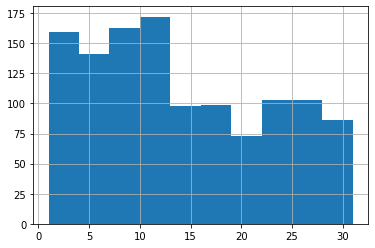

In [26]:
df['date_dd'].hist()
plt.show()

#### Thus, we can observe that the data is from Jan-March of 2015, effectively only a single quarter. We can check why the Quarter row has mentioned all Quarters from 1-5. It could be that it indicates the week of the month, rather than the Quarter of the year. 

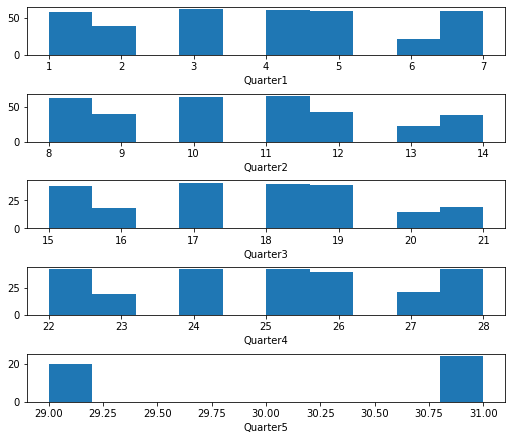

In [27]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows = 5, ncols = 1, figsize = (7,6), constrained_layout=True)

fig_axes_list = [fig,(ax1,ax2,ax3,ax4,ax5)]
axes_tuple = fig_axes_list[1]
quarter_list = list(df['quarter'].value_counts().sort_index().index)

#quarter_list = quarter_list + 'Quarter6'

#axes_list = ['ax1','ax2','ax3','ax4','ax5'] 

for ax in axes_tuple:
    idx = axes_tuple.index(ax)
    q_dates = df.loc[df['quarter'] == quarter_list[idx], 'date_dd']
    ax.hist(q_dates)
    ax.set_xlabel('{}'.format(quarter_list[idx]))
    #print('\n')
    #ax.show()
plt.show()    


#### Thus, we can observe that 'Quarter' implies quarter of the month and not quarter of the year. This can be an interesting point of analysis, and will come in handy while selecting the variables. 

In [28]:
### Cleaning the department column

df['department'].value_counts(dropna = False)

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [29]:
df['department'] = df['department'].str.strip()
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

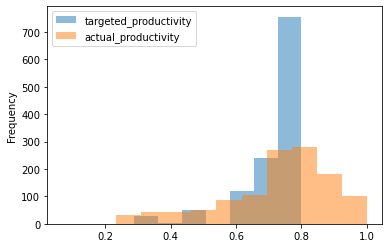

In [30]:
cols_prod = ['targeted_productivity', 'actual_productivity']

for col in cols_prod:
    df[col].plot.hist(alpha = 0.5)
    #plt.xlabel(col)

plt.legend()
plt.show()

#### On comparing the distributions between targeted and actual productivity, we can observe that targeted productivity is between 0.6 and 0.8 in most cases, but the actual productivity is more spread out. In some cases, it is less than 0.6 and in some cases, it is more than 0.8. 

#### A better way would be to plot the difference between target productivity and actual productivity. 

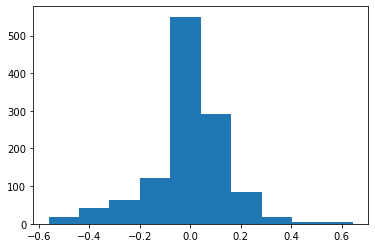

In [31]:
df['productivity_diff'] = df['actual_productivity'] - df['targeted_productivity']

plt.hist(df['productivity_diff'])
plt.show()

In [32]:
target_not_met = (df['productivity_diff'] < 0).sum()/len(df['productivity_diff'])*100
target_met_or_exceeded = (df['productivity_diff'] >= 0).sum()/len(df['productivity_diff'])*100

print('Instances of target not met', round(target_not_met,2), '%')
print('Instances of target met or exceeded', round(target_met_or_exceeded,2), '%')

Instances of target not met 29.66 %
Instances of target met or exceeded 70.34 %


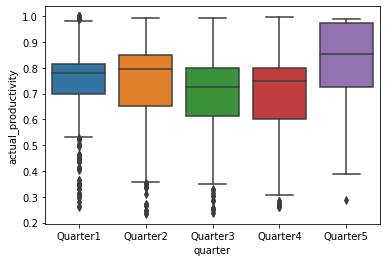

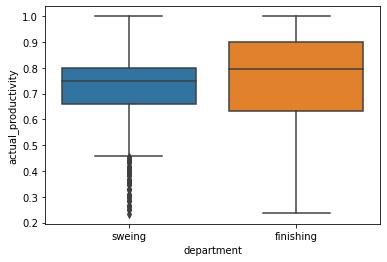

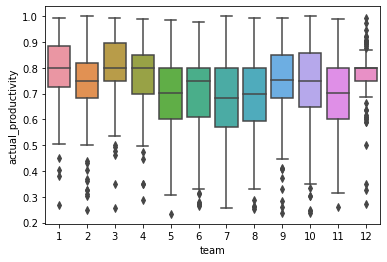

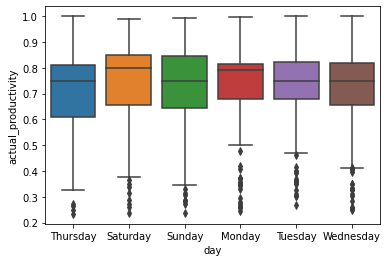

In [33]:
cols_cat_updated = [
 'quarter',
 'department','team','day'
]

for col in cols_cat_updated:
    sns.boxplot(data = df, x = col, y = 'actual_productivity')
    plt.show()

#### We can observe that all the categorical variables, 'department' , 'quarter', 'team' and 'day' have some impact on the productivity. It is possible that due to the last week of the month, the workers may feel motivated and put in extra effort, thereby increaseing the productivity. 

In [34]:
cols_num_updated = [col for col in cols_num if col != 'team']

cols_num_updated

In [35]:
df[cols_num_updated].corr()['actual_productivity']

targeted_productivity    0.411364
smv                     -0.132148
wip                      0.109836
over_time               -0.049783
incentive                0.068459
idle_time               -0.081459
idle_men                -0.183984
no_of_style_change      -0.197776
no_of_workers           -0.077352
actual_productivity      1.000000
Name: actual_productivity, dtype: float64

#### Correlation analysis is not giving a clear answer. For example 'over_time' could have had a high correlation with productivity but the correlation is only -.04. Hence we will conduct Data Cleaning and Feature selection in a more subjective way. 

In [36]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'year',
       'month', 'date_dd', 'productivity_diff'],
      dtype='object')

### Dataset Cleaning -

#### Column - 'date'

#### This column has already been updated with the datetime values. The timeframe is very less, hence we will not conduct any time series analysis. This column can be dropped. 

In [37]:
df = df.drop('date', axis = 1)
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity', 'year',
       'month', 'date_dd', 'productivity_diff'],
      dtype='object')

### Columns - Month, year and date_dd

#### Since we are not doing a time series analysis, we will drop these columns. 

In [38]:
df  = df.drop([ 'year',
       'month', 'date_dd'], axis = 1)
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity',
       'productivity_diff'],
      dtype='object')

### Columns - Idle Time, Idle Men and wip. 


In [39]:
df['idle_time'].value_counts(normalize = True)*100

0.0      98.496241
3.5       0.250627
4.5       0.167084
8.0       0.167084
2.0       0.167084
5.0       0.167084
4.0       0.167084
150.0     0.083542
270.0     0.083542
90.0      0.083542
6.5       0.083542
300.0     0.083542
Name: idle_time, dtype: float64

In [40]:
df['idle_men'].value_counts(normalize = True)*100

0     98.496241
10     0.250627
15     0.250627
20     0.250627
30     0.250627
35     0.167084
25     0.083542
37     0.083542
40     0.083542
45     0.083542
Name: idle_men, dtype: float64

#### Since 98% of the values are zero in both these columns, we will drop them, along with the wip column due to the uncertainty of implications of the missing data. 

In [41]:
df  = df.drop([ 'idle_time', 'idle_men', 'wip'], axis = 1)
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'productivity_diff'],
      dtype='object')

### Column -  'no_of_style_change'

In [42]:
df[['no_of_style_change']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   no_of_style_change  1197 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB


In [43]:
df[['no_of_style_change']].describe()

,no_of_style_change
count,1197.000000
mean,0.150376
std,0.427848
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [44]:
df[['no_of_style_change']].value_counts()

no_of_style_change
0                     1050
1                      114
2                       33
dtype: int64

#### We will remove this column as most observations are zero. 

In [45]:
df = df.drop('no_of_style_change', axis = 1)

df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'productivity_diff'],
      dtype='object')

In [46]:
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productivity_diff
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725,0.140725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500,0.136500


### Column - 'actual_productivity'

#### We can round it off to 2 decimal places, just like 'targeted_productivity'

In [47]:
df['actual_productivity'] = df['actual_productivity'].round(2)

df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productivity_diff
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.94,0.140725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.89,0.136500


### Column - 'no_of_workers'

In [48]:
df['no_of_workers'].value_counts()

8.0     262
58.0    114
57.0    109
59.0     75
10.0     60
       ... 
29.5      1
51.5      1
26.0      1
47.0      1
48.0      1
Name: no_of_workers, Length: 61, dtype: int64

#### Since the number of workers cannot be decimal values, we will update it to int data type. 

In [49]:
df['no_of_workers'] = df['no_of_workers'].astype(int)
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productivity_diff
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94,0.140725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89,0.136500
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,30,0.80,0.000570
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,30,0.80,0.000570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,56,0.80,0.000382


### Column creation - 'productive'

#### Since we are building a Classification Tree, we will create a binary column which will indicate if the team was productive or not on that given day. 

In [50]:
df['productive'] = df['productivity_diff'].apply(lambda x : True if x >=0 else False)

In [51]:
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productivity_diff,productive
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94,0.140725,True
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89,0.136500,True


#### We can also drop the column 'productivity_diff' as it is no longer required. 

In [52]:
df = df.drop('productivity_diff', axis = 1)

df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94,True
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89,True


#### We can reorder the columns for an easier reading. 

In [53]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'productive'],
      dtype='object')

In [54]:
col_order = ['quarter', 'day', 'department','team', 'no_of_workers', 'smv', 'over_time', 'incentive', 'targeted_productivity', 'actual_productivity', 'productive']

In [55]:
df = df[col_order]
df.head(2)

,quarter,day,department,team,no_of_workers,smv,over_time,incentive,targeted_productivity,actual_productivity,productive
0,Quarter1,Thursday,sweing,8,59,26.16,7080,98,0.80,0.94,True
1,Quarter1,Thursday,finishing,1,8,3.94,960,0,0.75,0.89,True


### Columns - 'quarter', 'team', 'department' and 'day' - OneHotEncoding

#### Since the column 'quarter' signifies quarter of the month, effectively the week of the month, we can convert it into dummy columns and add it to the dataframe.  Similarly we can convert 'team' and 'department' into dummy variables. We can also replace the terms with 1-5, to make them more precise. However we will treat them as categorical variables. 

In [56]:

replacement_dict = {'Quarter1' : '1', 'Quarter2' : '2', 'Quarter3' : '3',  'Quarter4' : '4', 'Quarter5' : '5', 
                   }

df['quarter'] = df['quarter'].replace(replacement_dict)
df['quarter'].value_counts()



1    360
2    335
4    248
3    210
5     44
Name: quarter, dtype: int64

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

tuple_list = [(OneHotEncoder(),['quarter']),(OneHotEncoder(),['department']),(OneHotEncoder(),['team']),(OneHotEncoder(),['day']) ]

col_trans = make_column_transformer(*tuple_list, remainder = 'passthrough', verbose_feature_names_out = False,)

onehot_array = col_trans.fit_transform(df)
column_names = col_trans.get_feature_names_out()

onehot_df = pd.DataFrame(data = onehot_array, columns = column_names)

onehot_df.columns

Index(['quarter_1', 'quarter_2', 'quarter_3', 'quarter_4', 'quarter_5',
       'department_finishing', 'department_sweing', 'team_1', 'team_2',
       'team_3', 'team_4', 'team_5', 'team_6', 'team_7', 'team_8', 'team_9',
       'team_10', 'team_11', 'team_12', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday',
       'no_of_workers', 'smv', 'over_time', 'incentive',
       'targeted_productivity', 'actual_productivity', 'productive'],
      dtype='object')

## Building the Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = onehot_df.drop(['actual_productivity', 'productive'], axis = 1)
y = onehot_df['productive']

##Found an error while using boolean values, converting them into string classes. 
y = y.apply(lambda x: 'Productive' if x == True else 'Not Productive')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 24 )

### Checking the class balance in both training and test sets

In [59]:
y_train.value_counts(dropna =False, normalize = True)*100

Productive        70.532915
Not Productive    29.467085
Name: productive, dtype: float64

In [60]:
y_test.value_counts(dropna =False, normalize = True)*100

Productive        69.583333
Not Productive    30.416667
Name: productive, dtype: float64

In [61]:
tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)

tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test,y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy', round(accuracy,3))
print('\n')
print('---------------Classification Report------------')
print(class_report)

Accuracy 0.817


---------------Classification Report------------
                precision    recall  f1-score   support

Not Productive       0.76      0.58      0.66        73
    Productive       0.83      0.92      0.88       167

      accuracy                           0.82       240
     macro avg       0.80      0.75      0.77       240
  weighted avg       0.81      0.82      0.81       240



#### Thus the accuracy is 81.7% and other metrics such as precision and recall are 84% and 82%. We can accept these results as satisfactory model performance. 

### Visualizing the Decision Tree

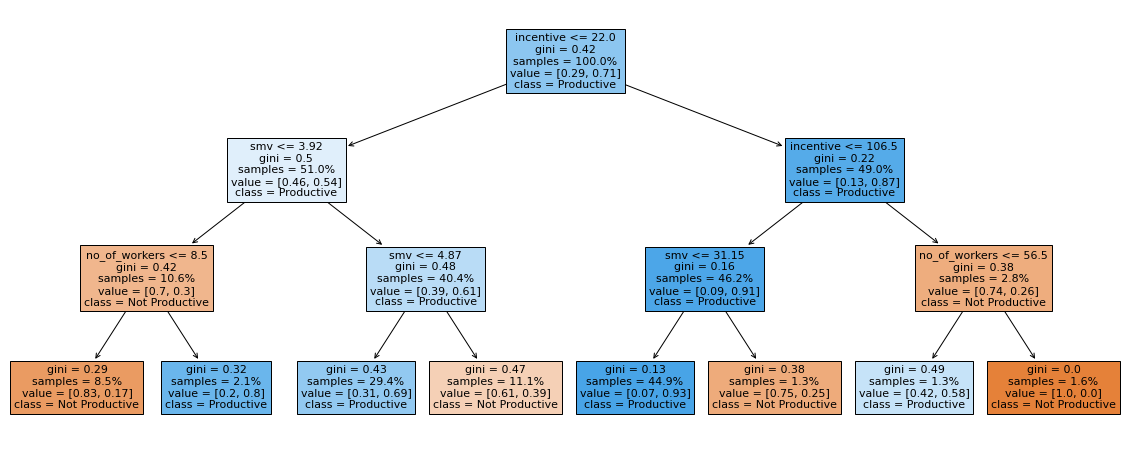

In [63]:
plt.figure(figsize = [20,8])

plot_tree(tree, 
          feature_names = X.columns,
          filled = True,
          proportion = True,
          precision = 2,
          fontsize = 11,
          class_names = tree.classes_
)

plt.show()

### Presenting the Tree Model in Text format

In [64]:
from sklearn.tree import export_text

exported_text = export_text(tree, feature_names = list(X.columns))

print(exported_text)

|--- incentive <= 22.00
|   |--- smv <= 3.92
|   |   |--- no_of_workers <= 8.50
|   |   |   |--- class: Not Productive
|   |   |--- no_of_workers >  8.50
|   |   |   |--- class: Productive
|   |--- smv >  3.92
|   |   |--- smv <= 4.87
|   |   |   |--- class: Productive
|   |   |--- smv >  4.87
|   |   |   |--- class: Not Productive
|--- incentive >  22.00
|   |--- incentive <= 106.50
|   |   |--- smv <= 31.15
|   |   |   |--- class: Productive
|   |   |--- smv >  31.15
|   |   |   |--- class: Not Productive
|   |--- incentive >  106.50
|   |   |--- no_of_workers <= 56.50
|   |   |   |--- class: Productive
|   |   |--- no_of_workers >  56.50
|   |   |   |--- class: Not Productive



### Interpretation

#### The decision tree can be interpreted as a combination of input factor ranges, that help predict if the worker would be productive or not. For Example, if we start from the top and move towards the left, if incentive is less than 22, smv is less than 3.92, and no. of workers is less than 8.5, then the team will not be productive. Similarly we can start from the top and go down to the last cell in any direction and that would give the final prediction of Productivity.  

#### This can be also considered like a flowchart for prediction, where each cell has a condition / threshold for any given input factor. These factors have been shortlisted as most relevant for predicting team productivity. 

## Random Forests Classifier (An Ensemble technique in Decision Trees)

In [65]:
from sklearn.ensemble import RandomForestClassifier

tree_rf = RandomForestClassifier()

tree_rf.fit(X_train,y_train)

y_pred_rf = tree_rf.predict(X_test)

accuracy_rf = accuracy_score( y_test, y_pred_rf)

print('Random Forest Model Accuracy = ', round(accuracy_rf*100,2), '%' )
print('Decision Tree Classifier Accuracy = ', round(accuracy*100,2), '%')

Random Forest Model Accuracy =  80.0 %
Decision Tree Classifier Accuracy =  81.67 %


#### The Classifier is giving higher accuracy in comparision to Random Forest. Now we will try to vary different parameters for both and check if both the models can be improved. 

In [66]:
parameters_dt = {"criterion": ["gini", "entropy"],
              "class_weight": [None, "balanced"],
              "min_samples_split": [12, 30, 48],
              "max_depth": list(range(3, 7)),
              "min_samples_leaf": list(range(9, 19, 3))
             }

parameters_rf = {"criterion": ["gini", "entropy"],
              "class_weight": [None, "balanced"],
              "min_samples_split": [12, 30, 48],
              "max_depth": list(range(3, 7)),
              "min_samples_leaf": list(range(9, 19, 3)),
                 "n_estimators" : [50,100,200]
             }

grid_object_dt = GridSearchCV(tree, param_grid = parameters_dt)
grid_object_rf = GridSearchCV(tree_rf, param_grid = parameters_rf)

grid_object_dt.fit(X_train,y_train)
grid_object_rf.fit(X_train,y_train) 

accuracy_dt = accuracy_score(y_test, grid_object_dt.predict(X_test))
accuracy_rf = accuracy_score(y_test, grid_object_rf.predict(X_test))

print('Random Forest Model Accuracy after Hyperparameter Tuning = ', round(accuracy_rf*100,2), '%' )
print('Decision Tree Classifier Accuracy after Hyperparameter Tuning = ', round(accuracy*100,2), '%')

Random Forest Model Accuracy after Hyperparameter Tuning =  75.0 %
Decision Tree Classifier Accuracy after Hyperparameter Tuning =  81.67 %


#### Hyperparameter Tuning reduced the accuracy of the Random Forest Model. Now we will keep other parameters constant and vary only the n_estimators parameter. 

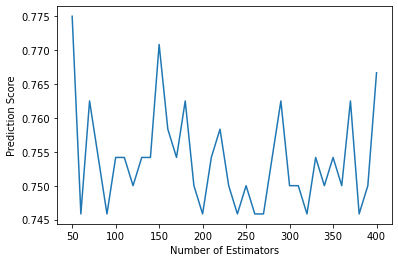

In [67]:
estimator_size_range = list(range(50,401,10))
scores = []

best_params_rf = grid_object_rf.best_params_

for estimator_size in estimator_size_range:
    best_params_minus_n_est = {key: value for key,value in best_params_rf.items() if key != 'n_estimators'}
    random_for_clf = RandomForestClassifier(n_estimators = estimator_size, **best_params_minus_n_est )                                    
    random_for_clf.fit(X_train, y_train)

    random_classifier_score = random_for_clf.score(X_test,y_test)
    scores.append(random_classifier_score)

    #print('Random Forest Test Score for n_estimators = ',estimator_size, ' is ', random_regressor_score)

plt.plot(estimator_size_range, scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Prediction Score')
plt.show()

#### It does't affect the accuracy much (from 75%, we are able to go up to 77%. in the second Random Forest Model (post hyperparameter tuning). Now we will the original Random Forest Classifier and vary only the n_estimators.  

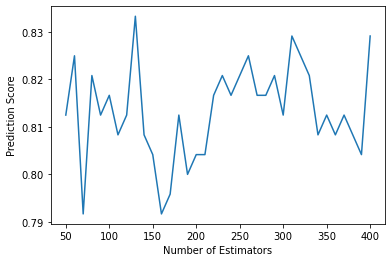

In [68]:
estimator_size_range = list(range(50,401,10))
scores = []

best_params_rf = tree_rf.get_params()

for estimator_size in estimator_size_range:
    best_params_minus_n_est = {key: value for key,value in best_params_rf.items() if key != 'n_estimators'}
    random_for_clf = RandomForestClassifier(n_estimators = estimator_size, **best_params_minus_n_est )                                    
    random_for_clf.fit(X_train, y_train)

    random_classifier_score = random_for_clf.score(X_test,y_test)
    scores.append(random_classifier_score)

    #print('Random Forest Test Score for n_estimators = ',estimator_size, ' is ', random_regressor_score)

plt.plot(estimator_size_range, scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Prediction Score')
plt.show()

#### Thus, after varying the number of estimators parameter, we are able to get a max accuracy of about 83.4% on the Original Random Forest Model. Hence we would prefer the original Random Forest Classifier. 

In [69]:
zipped = list(zip(estimator_size_range, scores))

max_score_estimator = max(zipped, key = lambda x: x[1])
print(max_score_estimator)

(130, 0.8333333333333334)


In [70]:
updated_scores = []

for score in zipped:
    est_score = round(score[1],3)
    if est_score >0.82:
        updated_scores.append((score[0], est_score ))

print(updated_scores)

[(60, 0.825), (80, 0.821), (130, 0.833), (230, 0.821), (250, 0.821), (260, 0.825), (290, 0.821), (310, 0.829), (320, 0.825), (330, 0.821), (400, 0.829)]


#### We would prefer the n_estimators at 130. 

In [72]:
best_params_rf_updated = best_params_rf
best_params_rf_updated['n_estimators'] = 130

print(best_params_rf_updated)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


#### Thus the final model is a RandomForestsClassifier instance with the above parameters, which gives an accuracy of 83.3 % on the test data. 

### Conclusions

#### Thus, we can see that the Random Forest Classifier was more accurate than Decision Tree Classifier (after both went through Hyper parameter tuning). The key learnings from this project were:

1. The subjective approach to Data Cleaning: The conventional approach would have been to check for the correlations between input and target variables and drop the ones with low correlations. However, a different approach was chosen, where we went on a  factor by factor basis and dropped or modified multiple variables based on different subjective criteria such as high number of missing values, or high proportion of observations having same values etc. 


2. The second learning was that a tuned Random Forests Classifier could give more accurate results over a tuned Decision Tree Classifier , though the difference was marginal (83.3 % vs 81.67%)


3. The Random Forests Classifier's accuracy originally was only 75% which was less than the base Decision Tree Classifier. The score showed a high improvement to 83.3% when only one parameter 'n_estimators' was varied and we chose its final value as 130. One can deduce that for RandomForests, it is better only to vary n_estimators instead of other parameters. However, this would require further knowlege and experience to conclude. 


4. Even though in the final evaluation the difference is marginal, we would still choose Random Forests over the Decision Tree Classifier as Random Forests are considered to be more robust. 